In [1]:
#pip install -U imbalanced-learn

In [2]:
#conda install -c conda-forge imbalanced-learn

In [3]:
#conda install -c glemaitre imbalanced-learn

In [4]:
#!pip install imblearn

In [5]:
#conda install -c conda-forge imbalanced-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [7]:
#importing the data set
dataset=pd.read_csv("D:/Test/creditcard.csv")
#dataset

In [8]:
dataset.shape

(284807, 31)

In [9]:
#dataset.info()

In [10]:
#dataset.describe()

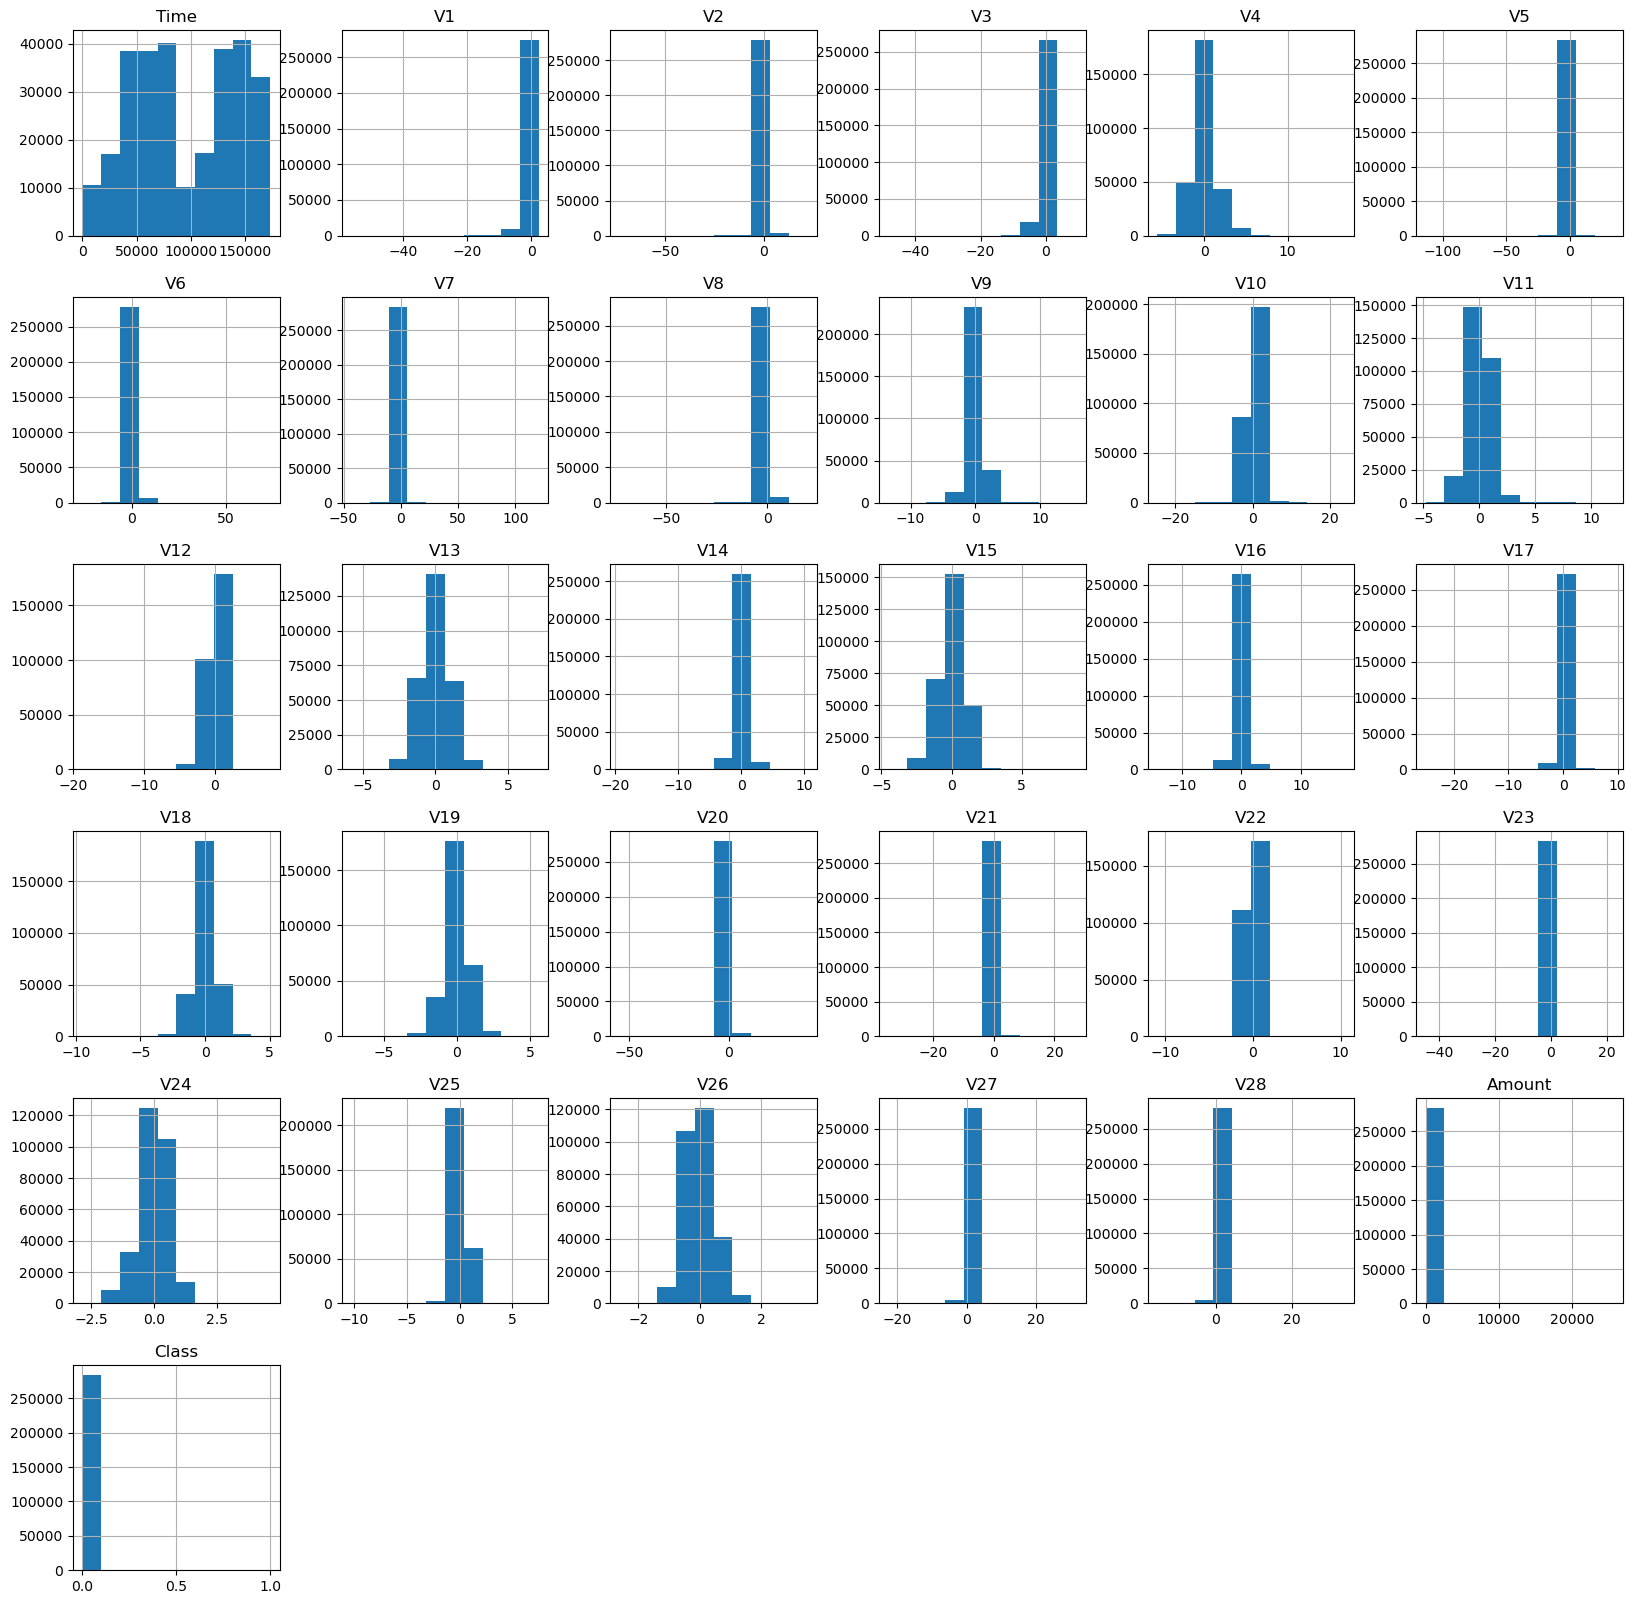

In [11]:
#EDA
# Plot histograms of each parameter 
dataset.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset

Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]


In [13]:
print(len(Fraud))
print(len(Valid))

492
284315


In [14]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017304750013189597


In [15]:
print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


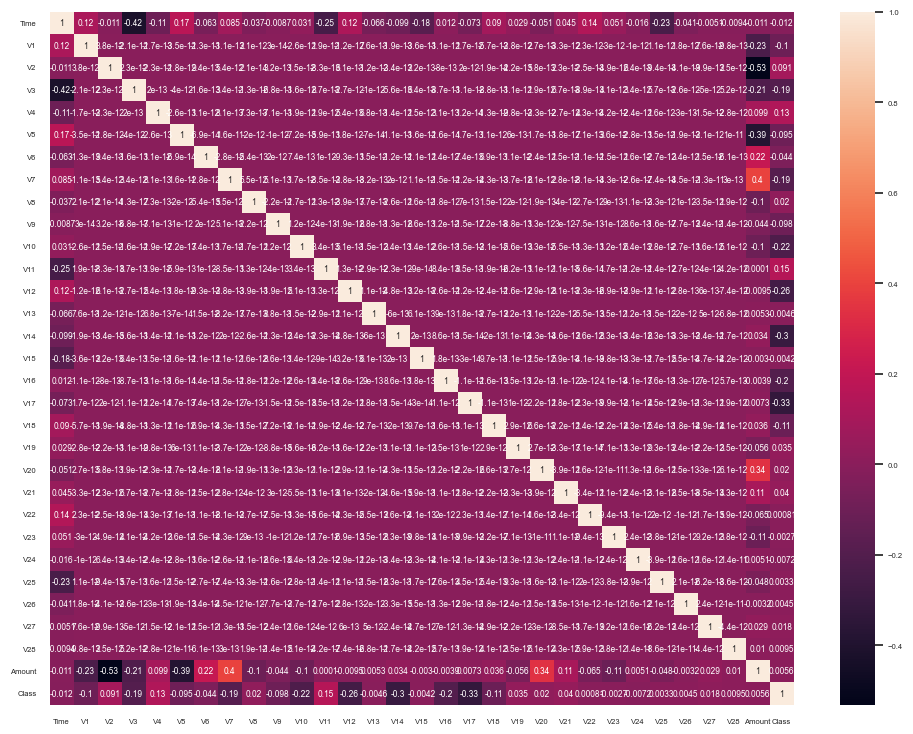

In [16]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))

sns.set(font_scale=0.5)
sns.heatmap(corrmat, annot=True)
plt.show()

In [17]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [18]:
X.shape

(284807, 30)

In [19]:
y.shape

(284807,)

In [20]:
## Split the Dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination='outlier_fraction',
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination='outlier_fraction')}

In [22]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [23]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

In [25]:
  # Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
    
n_errors = (y_pred != y).sum()
    

In [26]:
print(n_errors)

935


In [27]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(accuracy_score(y, y_pred))

0.9967170750718908


In [28]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [29]:
cm = confusion_matrix(y, y_pred)
cm

array([[283847,    468],
       [   467,     25]], dtype=int64)

In [30]:
TP=cm[0,0]
TN=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
print(TP)
print(TN)
print(FP)
print(FN)

283847
25
468
467


In [31]:
precision = TP/float(TP+FP)
precision

0.9983539384133795

In [32]:
recall = TP/float(TP+FN)
recall

0.9983574498617726

In [35]:
tpr = TP/float(TP+FN)
tpr

0.9983574498617726

In [36]:
fpr = FP/float(FP + TN)
fpr

0.949290060851927

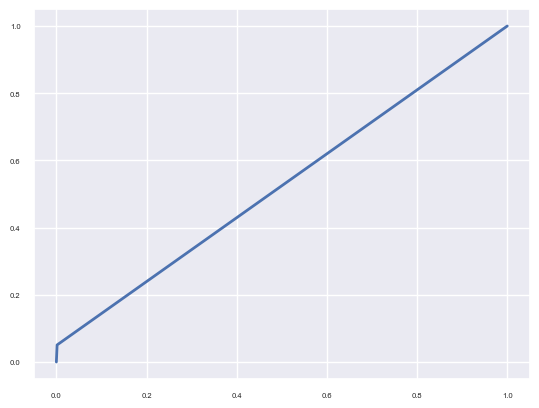

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, linewidth=2)
plt.show()